In [1]:
import sys
import random
import numpy as np
import torch
from torch.utils.tensorboard import SummaryWriter
sys.path.append('.')
from models.STG_NF.model_pose import STG_NF
from models.training import Trainer
from utils.data_utils import trans_list
from utils.optim_init import init_optimizer, init_scheduler
from args import create_exp_dirs
from args import init_parser, init_sub_args
from dataset import get_dataset_and_loader
from utils.train_utils import dump_args, init_model_params
from utils.scoring_utils import score_dataset
from utils.train_utils import calc_num_of_params

In [2]:
parser = init_parser()
parser.add_argument(
'-f',

)
args   = parser.parse_args()
args.dataset    = 'ShanghaiTech' 
args.checkpoint =  'checkpoints/ShanghaiTech_85_9.tar'
args.device = 'cpu'
if args.seed == 999:  # Record and init seed
    args.seed = torch.initial_seed()
    np.random.seed(0)
else:
    random.seed(args.seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True
    torch.manual_seed(args.seed)
    np.random.seed(0)

args, model_args = init_sub_args(args)
args.ckpt_dir = create_exp_dirs(args.exp_dir, dirmap=args.dataset)

pretrained = vars(args).get('checkpoint', None)
dataset, loader = get_dataset_and_loader(args, trans_list=trans_list, only_test=True)#(pretrained is not None))

model_args = init_model_params(args, dataset)
model = STG_NF(**model_args)
num_of_params = calc_num_of_params(model)
'''
trainer = Trainer(args, model, loader['train'], loader['test'],
                  optimizer_f=init_optimizer(args.model_optimizer, lr=args.model_lr),
                  scheduler_f=init_scheduler(args.model_sched, lr=args.model_lr, epochs=args.epochs))
if pretrained:
    trainer.load_checkpoint(pretrained)
else:
    writer = SummaryWriter()
    trainer.train(log_writer=writer)
    dump_args(args, args.ckpt_dir)

normality_scores = trainer.test()
auc, scores = score_dataset(normality_scores, dataset["test"].metadata, args=args)

# Logging and recording results
print("\n-------------------------------------------------------")
print("\033[92m Done with {}% AuC for {} samples\033[0m".format(auc * 100, scores.shape[0]))
print("-------------------------------------------------------\n\n")
'''

Experiment directories created


100%|█████████████████████████████████████████████████████████████████████████████████████████████| 107/107 [00:19<00:00,  5.39it/s]


Number of params in net: 0.616K


'\ntrainer = Trainer(args, model, loader[\'train\'], loader[\'test\'],\n                  optimizer_f=init_optimizer(args.model_optimizer, lr=args.model_lr),\n                  scheduler_f=init_scheduler(args.model_sched, lr=args.model_lr, epochs=args.epochs))\nif pretrained:\n    trainer.load_checkpoint(pretrained)\nelse:\n    writer = SummaryWriter()\n    trainer.train(log_writer=writer)\n    dump_args(args, args.ckpt_dir)\n\nnormality_scores = trainer.test()\nauc, scores = score_dataset(normality_scores, dataset["test"].metadata, args=args)\n\n# Logging and recording results\nprint("\n-------------------------------------------------------")\nprint("\x1b Done with {}% AuC for {} samples\x1b".format(auc * 100, scores.shape[0]))\nprint("-------------------------------------------------------\n\n")\n'

In [3]:
trainer = Trainer(args, model, loader['train'], loader['test'],
                  optimizer_f=init_optimizer(args.model_optimizer, lr=args.model_lr),
                  scheduler_f=init_scheduler(args.model_sched, lr=args.model_lr, epochs=args.epochs))
trainer.load_checkpoint(pretrained)

normality_scores = trainer.test()
auc, scores = score_dataset(normality_scores, dataset["test"].metadata, args=args)


Checkpoint loaded successfully from 'checkpoints/ShanghaiTech_85_9.tar' at (epoch 8)



  0%|                                                                                                       | 0/566 [00:00<?, ?it/s]

Starting Test Eval


100%|█████████████████████████████████████████████████████████████████████████████████████████████| 566/566 [00:13<00:00, 40.56it/s]


Scoring 107 clips


100%|████████████████████████████████████████████████████████████████████████████████████████████| 107/107 [00:00<00:00, 170.43it/s]


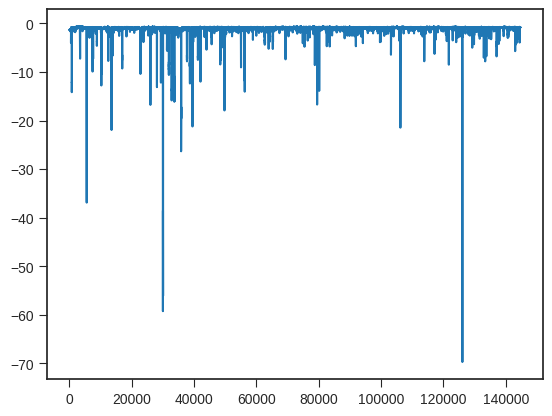

In [8]:
from matplotlib import pyplot as plt
plt.plot(normality_scores)

In [ ]:
out=model(dataset['test'].__getitem__(0)[0])

In [4]:
for img1 in loader['test']:
    print(img1[0].shape)
    break

torch.Size([256, 3, 24, 18])


In [5]:
dt = img1[0][:,:2]
label = img1[-1]
score = img1[-2]

In [6]:
#model=model.to('cpu')
device='cpu'
out=model(dt.type(torch.float32).to(device),label=label.type(torch.float32).to(device),score=score.type(torch.float32).to(device))

Processing...
Done!


Epoch: 001, AUC: 0.6720, AP: 0.6897
Epoch: 002, AUC: 0.6702, AP: 0.6865
Epoch: 003, AUC: 0.6692, AP: 0.6845
Epoch: 004, AUC: 0.6681, AP: 0.6838
Epoch: 005, AUC: 0.6673, AP: 0.6853
Epoch: 006, AUC: 0.6648, AP: 0.6856
Epoch: 007, AUC: 0.6610, AP: 0.6861
Epoch: 008, AUC: 0.6579, AP: 0.6867
Epoch: 009, AUC: 0.6552, AP: 0.6868
Epoch: 010, AUC: 0.6525, AP: 0.6861
Epoch: 011, AUC: 0.6504, AP: 0.6855
Epoch: 012, AUC: 0.6485, AP: 0.6848
Epoch: 013, AUC: 0.6468, AP: 0.6848
Epoch: 014, AUC: 0.6467, AP: 0.6860
Epoch: 015, AUC: 0.6482, AP: 0.6884
Epoch: 016, AUC: 0.6518, AP: 0.6908
Epoch: 017, AUC: 0.6592, AP: 0.6940
Epoch: 018, AUC: 0.6660, AP: 0.6967
Epoch: 019, AUC: 0.6696, AP: 0.6980
Epoch: 020, AUC: 0.6725, AP: 0.6989
Epoch: 021, AUC: 0.6773, AP: 0.7011
Epoch: 022, AUC: 0.6900, AP: 0.7060
Epoch: 023, AUC: 0.7110, AP: 0.7158
Epoch: 024, AUC: 0.7328, AP: 0.7284
Epoch: 025, AUC: 0.7463, AP: 0.7377
Epoch: 026, AUC: 0.7524, AP: 0.7425
Epoch: 027, AUC: 0.7560, AP: 0.7453
Epoch: 028, AUC: 0.7607, AP:

In [38]:
import networkx as nx

In [28]:
from torch_geometric.data import Data

In [36]:
dt=Data()

In [12]:
import json
src = '/home/irfan/Desktop/Code/Deep-Learning-For-Computer-Vision/MotionDetection/STG-NF/data/ShanghaiTech/pose/train/01_015_alphapose-results.json'
with open(src,'r') as file:
     data=json.load(file)

In [15]:
data[0].keys()

dict_keys(['image_id', 'category_id', 'keypoints', 'score', 'box', 'idx'])

In [16]:
for dt in data:
    print(dt['category_id'])

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [10]:
dt.keys()

dict_keys(['image_id', 'category_id', 'keypoints', 'score', 'box', 'idx'])

In [ ]:
for i in range(500):
    img0=dataset['train'].__getitem__(i)
    print(img0[1])

In [16]:
loader

{'test': <torch.utils.data.dataloader.DataLoader at 0x7fa53b257e50>,
 'train': None}

In [9]:
pp.seed

AttributeError: 'ArgumentParser' object has no attribute 'seed'

In [10]:
!python train_eval.py --dataset ShanghaiTech --checkpoint checkpoints/ShanghaiTech_85_9.tar

Experiment directories created
100%|█████████████████████████████████████████| 107/107 [00:30<00:00,  3.49it/s]
Traceback (most recent call last):
  File "train_eval.py", line 60, in <module>
    main()
  File "train_eval.py", line 35, in main
    dataset, loader = get_dataset_and_loader(args, trans_list=trans_list, only_test=(pretrained is not None))
  File "/home/irfan/Desktop/Code/Deep-Learning-For-Computer-Vision/MotionDetection/STG-NF/dataset.py", line 136, in get_dataset_and_loader
    dataset[split] = PoseSegDataset(args.pose_path[split], path_to_vid_dir=args.vid_path[split],
  File "/home/irfan/Desktop/Code/Deep-Learning-For-Computer-Vision/MotionDetection/STG-NF/dataset.py", line 54, in __init__
    gen_dataset(path_to_json_dir, num_clips=num_clips, ret_keys=True,
  File "/home/irfan/Desktop/Code/Deep-Learning-For-Computer-Vision/MotionDetection/STG-NF/dataset.py", line 215, in gen_dataset
    segs_data_np = keypoints17_to_coco18(segs_data_np)
  File "/home/irfan/Desktop/Code/